<a href="https://colab.research.google.com/github/UmeshGayashan/OCR_RegNo_Detection/blob/main/OCR_RegNo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
## Go to the drive and get the data
```



In [3]:
# !-shell command, -q -quiet mode, -U -upgrade
# download files and folders from Google Drive
!pip install -qU gdown
!pip install easyocr

# Mount Google Drive directly
from google.colab import drive
drive.mount('/content/gdrive')

# Verify dataset access using native path
import os

dataset_path = '/content/gdrive/MyDrive/OCR_dataset'
if os.path.exists(dataset_path):
    print(f"Found {len(os.listdir(dataset_path))} files:")
    for idx, file in enumerate(os.listdir(dataset_path), 1):
        print(f"{idx}. {file}")
else:
    print("Error: Folder not found. Check sharing permissions and folder name.")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import easyocr
import os

In [5]:
# Initialize OCR reader
reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [6]:
def process_registration_number(image_path):
    # Load image
    image = cv2.imread(image_path)
    original = image.copy()

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply threshold to get binary image
    _, thresh = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY_INV)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Sort contours by area (descending)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)

    # The registration number box is typically the second largest contour
    registration_box = contours[1]

    # Get bounding rectangle of the registration box
    x, y, w, h = cv2.boundingRect(registration_box)

    # Extract the registration box region
    roi = original[y:y+h, x:x+w]

    # Display the extracted region
    plt.figure(figsize=(10, 4))
    plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
    plt.title("Extracted Registration Box")
    plt.axis('off')
    plt.show()

    # Preprocess ROI for better OCR
    roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    _, roi_thresh = cv2.threshold(roi_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # OCR to extract text
    results = reader.readtext(roi)

    # Extract and format registration number
    reg_number = ""
    for detection in results:
        reg_number += detection[1] + " "

    # Clean up the registration number
    reg_number = reg_number.strip()

    return roi, reg_number

In [7]:
def process_all_images(folder_path):
    results = []

    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(folder_path, filename)

            # Extract ground truth from filename
            ground_truth = os.path.splitext(filename)[0].replace("_", " ")

            # Process image
            roi, predicted_reg = process_registration_number(image_path)

            # Store results
            results.append({
                'filename': filename,
                'ground_truth': ground_truth,
                'predicted': predicted_reg
            })

            print(f"File: {filename}")
            print(f"Ground Truth: {ground_truth}")
            print(f"Predicted: {predicted_reg}")
            print('-' * 40)

    return results

In [8]:
# Main execution code
dataset_path = '/content/gdrive/MyDrive/OCR_dataset'

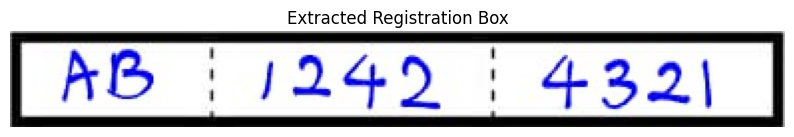

File: AB_1242_4321.jpg
Ground Truth: AB 1242 4321
Predicted: AB 1242 4321
----------------------------------------


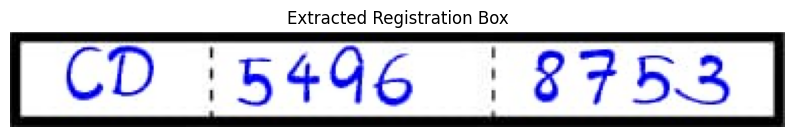

File: CD_5496_8753.jpg
Ground Truth: CD 5496 8753
Predicted: CD 5496 8753
----------------------------------------


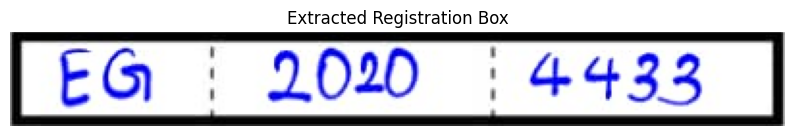

File: EG_2020_4433.jpg
Ground Truth: EG 2020 4433
Predicted: EG 2020 4433
----------------------------------------


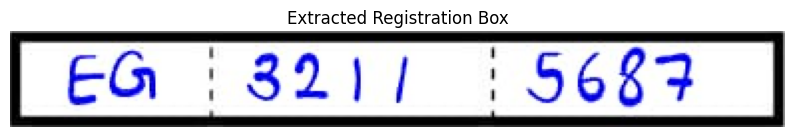

File: EG_3211_5687.jpg
Ground Truth: EG 3211 5687
Predicted: EG 32 | / 5687
----------------------------------------


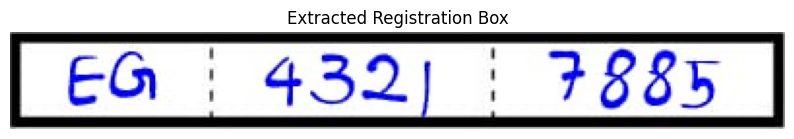

File: EG_4321_7885.jpg
Ground Truth: EG 4321 7885
Predicted: EG 4321 7885
----------------------------------------


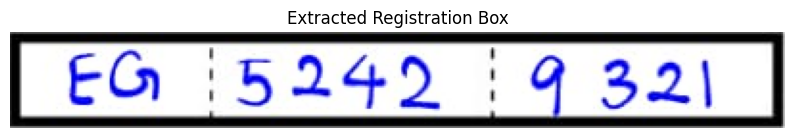

File: EG_5242_9321.jpg
Ground Truth: EG 5242 9321
Predicted: EG 5242 321
----------------------------------------


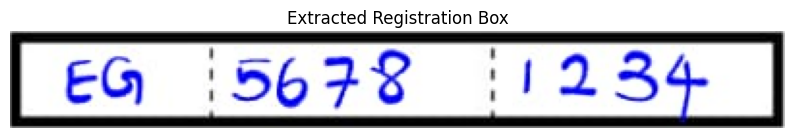

File: EG_5678_1234.jpg
Ground Truth: EG 5678 1234
Predicted: Eq 567 8 7234
----------------------------------------
Accuracy: 4/7 = 57.14%


In [9]:
# Process all images and get results
results = process_all_images(dataset_path)

# Calculate accuracy
correct = 0
for r in results:
    # Compare extracted reg number with filename
    if r['ground_truth'] == r['predicted']:
        correct += 1

print(f"Accuracy: {correct}/{len(results)} = {correct/len(results)*100:.2f}%")
